# 1. 复习上课内容以及复现课程代码

In [88]:
!pip --default-timeout=100 install Keras

^C


In [87]:
###老师，您好！由于Lecture4 BP神经网络部分课堂代码较复杂，加上自己基础较薄弱，还在努力学习理解当中，
###先将后面部分完成的作业提交，后续再继续努力对课堂代码再进行学习和复现。

import keras
from keras.layers import Dense
from keras.models import Sequential

X_ = data['data']
model = Sequential()

model.add(Dense(units=64, activation='sigmoid', input_dim=13))
model.add(Dense(units=30, activation='sigmoid', input_dim=64))
model.add(Dense(units=1))

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['mse'])

model.fit(X_, y_, epochs=5000, batch_size=32)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

# 2. 理论问题

1. What does a neuron compute?
正向计算过程中：输入层为输入数据集x，隐含层和输出层的计算包括两步（加权求和(w和b参数)得到的输入值z，将z通过激活函数非线性转化后输出值a); 反向传播过程中：隐含层和输出层需要计算直接变量z的偏导，并传递到上一层神经元。


2. Why we use non-linear activation funcitons in neural networks?
如果使用线性激活函数，输入x与输出y之间会是线性关系，会出现无论神经网络的层数有多少，总存在一个等效无隐藏层的网络与之等效，因此神经网络的层数加深就失去了意义。

3. What is the 'Logistic Loss' ?

损失函数评价的是网络训练输出a与真实y的差距。

4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

C. sigmoid


5. Why we don't use zero initialization for all parameters ?

如果参数全部初始化为0，则网络输出为0，在反向传播过程中，使输出层与隐藏层，隐藏层与输入层之间的更新参数全部一样，因此不论正向和反向传播进行多少轮，每两层之间的更新参数一样，这样就失去了神经网络学习不同特征的功能，导致模型失效和不收敛。



6. Can you implement the softmax function using python ?



# 3.实践题

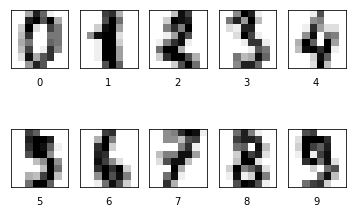

[1.0, 1.0, 1.0, 1.0, 1.0]


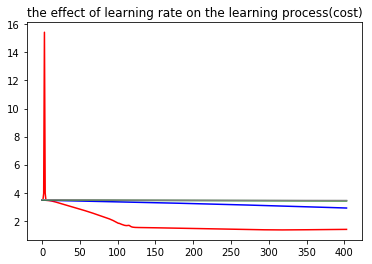

In [83]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

digits = datasets.load_digits()
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()
#print(digits.target)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)
#print(X_train[0])
#print(X_test)
#print(y_train)
#print(y_test)
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T
x_num = X_train.shape[0]
y_num = y_train.shape[0]
h_num = 5


def sigmoid(z):
    return 1./(1 + np.exp(-1 * z))

#print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

def initialize_parameters(x_num, y_num, h_num):
    W1 = np.random.randn(h_num, x_num) * 0.01
    b1 = np.zeros((h_num, 1))
    W2 = np.random.randn(y_num, h_num) * 0.01
    b2 = np.zeros((y_num, 1))
    
    WB_params = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    }
    return WB_params

#WB_params = initialize_parameters(x_num, y_num, h_num)

def propagate(X, Y, WB_params):
    
    W1 = WB_params['W1']
    b1 = WB_params['b1']
    W2 = WB_params['W2']
    b2 = WB_params['b2']
    
    #print(W1.shape)
    #print(b1.shape)
    #print(W2.shape)
    #print(b2.shape)
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)            #sigmoid激活函数
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)           #sigmoid激活函数
    
    #print(Z1.shape)
    #print(A1.shape)
    #print(Z2.shape)
    #print(A2.shape)
    assert (A2.shape[1] == X.shape[1])
    
    Process_params = {
    'Z1': Z1,
    'A1': A1,
    'Z2': Z2,
    'A2': A2,
    }
    return Process_params

def calcu_cost(A2, Y, WB_params):
    m = Y.shape[0]
    W1 = WB_params['W1']
    W2 = WB_params['W2']
    cost = -np.sum(np.multiply(np.log(A2), Y) + np.multiply(np.log(1.- A2), 1.-Y))/m
    cost = np.squeeze(cost)
    assert (isinstance(cost, float))
    
    return cost

#A2 = propagate(X_train, y_train, WB_params)['A2']
#print(calcu_cost(A2, y_train, WB_params))

def back_propagate(X, Y, WB_params, Process_params):
    m = X.shape[1]
    W1 = WB_params['W1']
    W2 = WB_params['W2']
    A1 = Process_params['A1']
    A2 = Process_params['A2']
    
    #对W和B求偏导
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1 ** 2)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    ##梯度
    
    WB_grads = {'dW1': dW1, 'dW2': dW2, 'db1': db1, 'db2': db2}
    
    return WB_grads

#Process_params = propagate(X_train, y_train, WB_params)[0]
#back_propagate(X_train, y_train, WB_params, Process_params)

def refresh_WB(WB_params, WB_grads, learning_rate):
    W1 = WB_params['W1']
    b1 = WB_params['b1']
    W2 = WB_params['W2']
    b2 = WB_params['b2']

    dW1 = WB_grads['dW1']
    db1 = WB_grads['db1']
    dW2 = WB_grads['dW2']
    db2 = WB_grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    WB_params = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    }
    
    return WB_params

#WB_grads = back_propagate(X_train, y_train, WB_params, Process_params)
#refresh_WB(WB_params, WB_grads, 0.001)

def optimize(X, Y, num_iterations, learning_rate, print_cost=False):
    
    costs = [] 
    
    WB_params = initialize_parameters(x_num, h_num, y_num)
    W1 = WB_params['W1']
    b1 = WB_params['b1']
    W2 = WB_params['W2']
    b2 = WB_params['b2']

    for i in range(num_iterations):
        Process_params = propagate(X, Y, WB_params)
        A2 = Process_params['A2']
        cost = calcu_cost(A2, Y, WB_params)
        costs.append(cost)
        WB_grads = back_propagate(X, Y, WB_params, Process_params)
        WB_params = refresh_WB(WB_params, WB_grads, learning_rate)
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    #plt.plot(costs)
    return WB_params, WB_grads, costs

#optimized_wb = optimize(X_train, y_train, 4000, 0.01, print_cost=False)

def predict(WB_params, X_test, Y_test):
    Process_params = propagate(X_test, Y_test, WB_params)
    predicted_y = Process_params['A2']
    #print (predicted_y)
    predicted_y[predicted_y <= 0.5] = 0
    predicted_y[predicted_y > 0.5] = 1
    
    return predicted_y

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=False):
    optimized_wb = optimize(X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    WB_params = optimized_wb[0]
    cost = optimized_wb[2][-1]
    predicted_y_test = predict(WB_params, X_test, Y_test)
    predicted_y_train = predict(WB_params, X_train, Y_train)
    count_test = 0
    count_train = 0
    for i in range(predicted_y_test.shape[0]):
        if predicted_y_test[0][i] == Y_test[i]:
            count_test += 1
    for i in range(predicted_y_train.shape[0]):
        if predicted_y_train[0][i] == Y_train[i]:
            count_train += 1
    
    test_accu = count_test/predicted_y_test.shape[0]
    train_accu = count_train/predicted_y_train.shape[0]
    
    d = {"WB_params": WB_params, "test_accuracy":test_accu, "train_accuracy":train_accu, "cost":cost}
    return d

print(model(X_train, y_train, X_test, y_test, 400, 0.005, print_cost=False))


## the effect of learning rate on the learning process
### cost会随着learning rate的减小不断减小直至不变。
learning_rates = [0.1, 0.001, 0.0001, 0.00005]
colors = ['red', 'blue', 'green', 'grey']
plt.title('the effect of learning rate on the learning process(cost)')
for i in range(len(learning_rates)):
    costs = optimize(X_train, y_train, 400, learning_rates[i], print_cost=False)[2]
    plt.plot(costs, color=colors[i], label=str(learning_rates[i]))

##nums_iterations 对 test_accuracy的影响
nums_iterations = [400, 800, 1000, 2000, 4000]
nums_iterations_accu = []
for num in nums_iterations:
    nums_iterations_accu.append(model(X_train, y_train, X_test, y_test, num, 0.005, print_cost=False)['test_accuracy'])
    
print(nums_iterations_accu)